# Linear Regression

---
The first task we are going to work on is linear regression.

In fact we have experience with regression long before it was known as _machine learning_ so let us recall that analysis and take it as a starting point.

First we need some data to analyze, there are plenty of sources of free data that we can use as a learning tool, for instance `scikit-learn`, the machine learning library we are going to use here on, has some datasets on it, so let us import that module of the library,

In [1]:
from sklearn import datasets

We have already imported the library, but so far, we don't know how the functions in that library are called. To do that, there is a very useful command, the `dir` command. To know more about it, we can use the `help` command.

In [2]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



So, to know more about the datasets package, let us use the `dir` command on the `dataset`

In [3]:
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

look that there are some methods that start with _load_, let us print just them

In [4]:
for i in dir(datasets):
    if i.startswith("load"):
        print(i)

load_boston
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


These are some preloaded datasets, all with the same structure so once we learn how to import and use one, we are able to use all of them. So let us take the first of them and again, the `dir` command.

In [5]:
print(dir(datasets.load_boston()),type(datasets.load_boston()))

['DESCR', 'data', 'feature_names', 'filename', 'target'] <class 'sklearn.utils.Bunch'>


Look that in addition to the `dir` command, we printed out the datatype of the dataset. I is what is called a _Bunch_ from _scikit-learn_. The best way to understand them is that they are like a dictionary, so we can access to all of the contents using `[]` and the correspondent string or a `pandas.DataFrame` with a _dot (.)_.

Let us save the data on a local variable.

In [6]:
data=datasets.load_boston()

Let us now use the `DESCR` component. It stands for _description_

In [7]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

So, now we know what our data is, and what is the _target_, calculate the price of a house, given some characteristics.

Let us now import some necessary libraries and organize the data, so we can do a linear regression to predict the data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

The libraries we are using are

- `pandas`: Data analysis
- `numpy`: Array-like data.
- `matplotlib.pylab`: plotting

just as we saw the description of the data, we also have another two elements `data` and `feature_names`, so let us introduce a little pandas structure by creating a `pandas.DataFrame` with the data and names we had before.

In [30]:
features=pd.DataFrame(data.data,columns=data.feature_names)

`pandas` made `python` a great choice to do data science, so let us see the `pandas.DataFrame` named `features`

In [31]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


There you can see that we have a _Table_ of the whole bunch of data, and let us suppose we don't want to use all the columns of `features` in our model, we just select 

- CRIM
- AGE
- NOX
- RM
- DIS

This selection has to be done carefully and there must be some idea of the model to be used.

In [32]:
selection=["CRIM","AGE","NOX","RM","DIS"]
Use=features[selection]

**Note** We should treat this data before we proceed, but as this is an introductory part, we will leave this like that. 

In [33]:
Use

,CRIM,AGE,NOX,RM,DIS
0,0.00632,65.2,0.538,6.575,4.0900
1,0.02731,78.9,0.469,6.421,4.9671
2,0.02729,61.1,0.469,7.185,4.9671
3,0.03237,45.8,0.458,6.998,6.0622
4,0.06905,54.2,0.458,7.147,6.0622
...,...,...,...,...,...
501,0.06263,69.1,0.573,6.593,2.4786
502,0.04527,76.7,0.573,6.120,2.2875
503,0.06076,91.0,0.573,6.976,2.1675
504,0.10959,89.3,0.573,6.794,2.3889


Finally, we can get the target data from the initial `Bunch`.

In [35]:
target=data.target

let us see some of them

In [37]:
target[:50]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

We are considering a set of data $X$ (matrix) to have a linear relationship with a $y$, so we may write it as follows
$$y=X\beta+c$$
so we need to find the optimal values for the vectors $\beta$ and $c$

We want to train one model but, how do we know if our model works properly if we cannot get more data to test?, we may separate our data in two parts, a train and a test set. 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
print(target.shape,Use.shape)

(506,) (506, 5)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(Use,target,test_size=0.2,random_state=1)

In [18]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 5) (102, 5) (404,) (102,)


In [19]:
type(y_test)

numpy.ndarray

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.score(X_test,y_test)

0.6376487091826282

In [25]:
y_pred=model.predict(X_test)

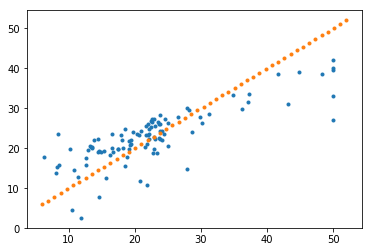

In [26]:
plt.plot(y_test,y_pred,'.')

x_plot=np.linspace(6,52)
plt.plot(x_plot,x_plot,'.')

In [27]:
model.coef_

array([ -0.19709308,  -0.071331  , -18.86579325,   7.26027234,
        -1.20034291])

In [28]:
model.fit_intercept

True